In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans

In [18]:
data_folder = './csv/'
data_file = 'A_left_forelimb_mouse_features_2025-02-25_14-10-48.csv'

full_data = pd.read_csv(data_folder + data_file)
print(full_data.head())

dataset_names = full_data["Dataset"].unique()
dfs = {name: full_data[full_data["Dataset"] == name] for name in dataset_names}

dfs.keys()


   Dataset  Mouse  Number of runs (#)  Number of steps (#)  \
0  postDLC      1                   3                    9   
1  postDLC      2                   4                    6   
2  postDLC      3                   5                   12   
3  postDLC      4                   3                    7   
4  postDLC      5                   3                    7   

   Mean step height (m)  Mean step height std  Mean step length (m)  \
0              0.005662              0.000558              0.067614   
1              0.005549              0.000162              0.085259   
2              0.005631              0.000768              0.067503   
3              0.005492              0.000434              0.072579   
4              0.006893              0.000666              0.076659   

   Mean step length std  Mean stride length (m)  Mean stride length std  ...  \
0              0.007168                0.066444                0.006535  ...   
1              0.002706                0

dict_keys(['postDLC', 'preDLC'])

In [19]:
scaler = StandardScaler()

correlation_matrixes = {name: None for name in dfs.keys()}
distance_matrixes = {name: None for name in correlation_matrixes.keys()}
linkage_matrixes = {name: None for name in correlation_matrixes.keys()}
num_clusters = {name: None for name in correlation_matrixes.keys()}
feature_clusters = {name: None for name in correlation_matrixes.keys()}

for name, df in dfs.items():
    columns_to_drop = ["Dataset", "Mouse", "Number of runs (#)", "Number of steps (#)"]
    columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    dfs[name] = df.drop(columns=columns_to_drop)
    
    # Standardize the features
    dfs[name] = pd.DataFrame(scaler.fit_transform(dfs[name]), columns=dfs[name].columns)

    # Compute the Spearman correlation matrix. Assumes that the data is not normally distributed and monotonic
    correlation_matrixes[name] = dfs[name].corr(method="spearman")

    # Compute the distance matrix as 1 - absolute value of the correlation matrix
    distance_matrixes[name] = 1 - np.abs(correlation_matrixes[name])
    distance_matrixes[name] = squareform(distance_matrixes[name])
    
    # Perform hierarchical/agglomerative clustering using the Ward method
    linkage_matrixes[name] = linkage(distance_matrixes[name], method="ward")
    
    # Form flat clusters from the hierarchical clustering defined by the linkage matrix
    num_clusters[name] = fcluster(linkage_matrixes[name], t=0.5, criterion='distance')
    
    # Create a dataframe to map features to their respective clusters
    feature_clusters[name] = pd.DataFrame({"Feature": dfs[name].columns, "Cluster": num_clusters[name]})

# Display the first few rows of the 'postDLC' dataframe
dfs['postDLC'].head()

Mean step height (m)  Mean step height std  Mean step length (m)  \
0              0.135530             -0.330715             -0.865720   
1             -0.074343             -1.494270              1.596885   
2              0.078857              0.286615             -0.881168   
3             -0.179165             -0.694549             -0.172775   
4              2.420528             -0.014047              0.396670   

   Mean step length std  Mean stride length (m)  Mean stride length std  \
0              0.603467               -0.672741                0.158786   
1             -1.136611                1.670712               -1.100731   
2              0.388831               -0.672016               -0.149925   
3              0.155511                0.239199                0.014815   
4             -0.760944                0.697051                0.222218   

   Mean step duration (s)  Mean step duration std  Mean stance duration (s)  \
0                1.621657                0.376411                  1.972327   
1               -1.212488               -0.799882                 -0.592662   
2                0.603349                0.028730                  0.772255   
3               -0.595057               -1.046819                 -0.920994   
4                0.015771               -0.504462                 -0.767339   

   Mean stance duration std  ...  \
0                 -0.016238  ...   
1                 -0.437160  ...   
2                  0.052545  ...   
3                 -1.366605  ...   
4                 -0.438445  ...   

   Phase angular acceleration - rforelimb - wrist mean  \
0                                           0.815899     
1                                          -2.215848     
2                                           0.438688     
3                                          -0.234066     
4                                           0.591834     

   Phase angular acceleration - rforelimb - wrist std  \
0                                           0.867362    
1                                          -1.069046    
2                                          -0.381820    
3                                          -0.110906    
4                                           1.279875    

   Phase angular acceleration - rhindlimb - hip mean  \
0                                           1.340388   
1                                          -1.827464   
2                                           0.342637   
3                                          -0.093846   
4                                           0.465913   

   Phase angular acceleration - rhindlimb - hip std  \
0                                         -1.416549   
1                                          1.623034   
2                                         -0.245927   
3                                         -0.097804   
4                                         -0.095795   

   Phase angular acceleration - rhindlimb - knee mean  \
0                                           1.337974    
1                                          -1.809025    
2                                           0.297865    
3                                           0.091382    
4                                           0.445824    

   Phase angular acceleration - rhindlimb - knee std  \
0                                          -1.369222   
1                                           1.600137   
2                                          -0.244638   
3                                          -0.459833   
4                                          -0.088012   

   Phase angular acceleration - rhindlimb - ankle mean  \
0                                           1.317347     
1                                          -2.047777     
2                                           0.268728     
3                                          -0.037168     
4                                           0.472080     

   Phase angular acceleration - rhindlimb - 

In [20]:
correlation_matrixes['postDLC'].head()

Mean step height (m)  Mean step height std  \
Mean step height (m)                1.000000             -0.442424   
Mean step height std               -0.442424              1.000000   
Mean step length (m)                0.151515             -0.321212   
Mean step length std               -0.272727              0.139394   
Mean stride length (m)              0.369697             -0.551515   

                        Mean step length (m)  Mean step length std  \
Mean step height (m)                0.151515             -0.272727   
Mean step height std               -0.321212              0.139394   
Mean step length (m)                1.000000             -0.369697   
Mean step length std               -0.369697              1.000000   
Mean stride length (m)              0.769697             -0.733333   

                        Mean stride length (m)  Mean stride length std  \
Mean step height (m)                  0.369697               -0.333333   
Mean step height std                 -0.551515                0.309091   
Mean step length (m)                  0.769697               -0.272727   
Mean step length std                 -0.733333                0.878788   
Mean stride length (m)                1.000000               -0.624242   

                        Mean step duration (s)  Mean step duration std  \
Mean step height (m)                 -0.066667                0.090909   
Mean step height std                  0.454545                0.078788   
Mean step length (m)                 -0.793939               -0.539394   
Mean step length std                  0.054545                0.551515   
Mean stride length (m)               -0.636364               -0.624242   

                        Mean stance duration (s)  Mean stance duration std  \
Mean step height (m)                    0.018182                 -0.418182   
Mean step height std                    0.430303                  0.406061   
Mean step length (m)                   -0.442424                 -0.527273   
Mean step length std                   -0.018182                  0.042424   
Mean stride length (m)                 -0.503030                 -0.503030   

                        ...  \
Mean step height (m)    ...   
Mean step height std    ...   
Mean step length (m)    ...   
Mean step length std    ...   
Mean stride length (m)  ...   

                        Phase angular acceleration - rforelimb - wrist mean  \
Mean step height (m)                                             0.042424     
Mean step height std                                             0.490909     
Mean step length (m)                                            -0.806061     
Mean step length std                                             0.236364     
Mean stride length (m)                                          -0.672727     

                        Phase angular acceleration - rforelimb - wrist std  \
Mean step height (m)                                             0.696970    
Mean step height std                                            -0.187879    
Mean step length (m)                                             0.284848    
Mean step length std                                            -0.103030    
Mean stride length (m)                                           0.260606    

                        Phase angular acceleration - rhindlimb - hip mean  \
Mean step height (m)                                             0.054545   
Mean step height std                                             0.503030   
Mean step length (m)                                            -0.818182   
Mean step length std                                             0.200000   
Mean stride length (m)                                          -0.648485   

                        Phase angular acceleration - rhindlimb - hip std  \
Mean step height (m)                                            0.151515   
Mean step height std                                           -0.527273   
M

In [21]:
linkage_matrixes['postDLC'].shape

(2997, 4)

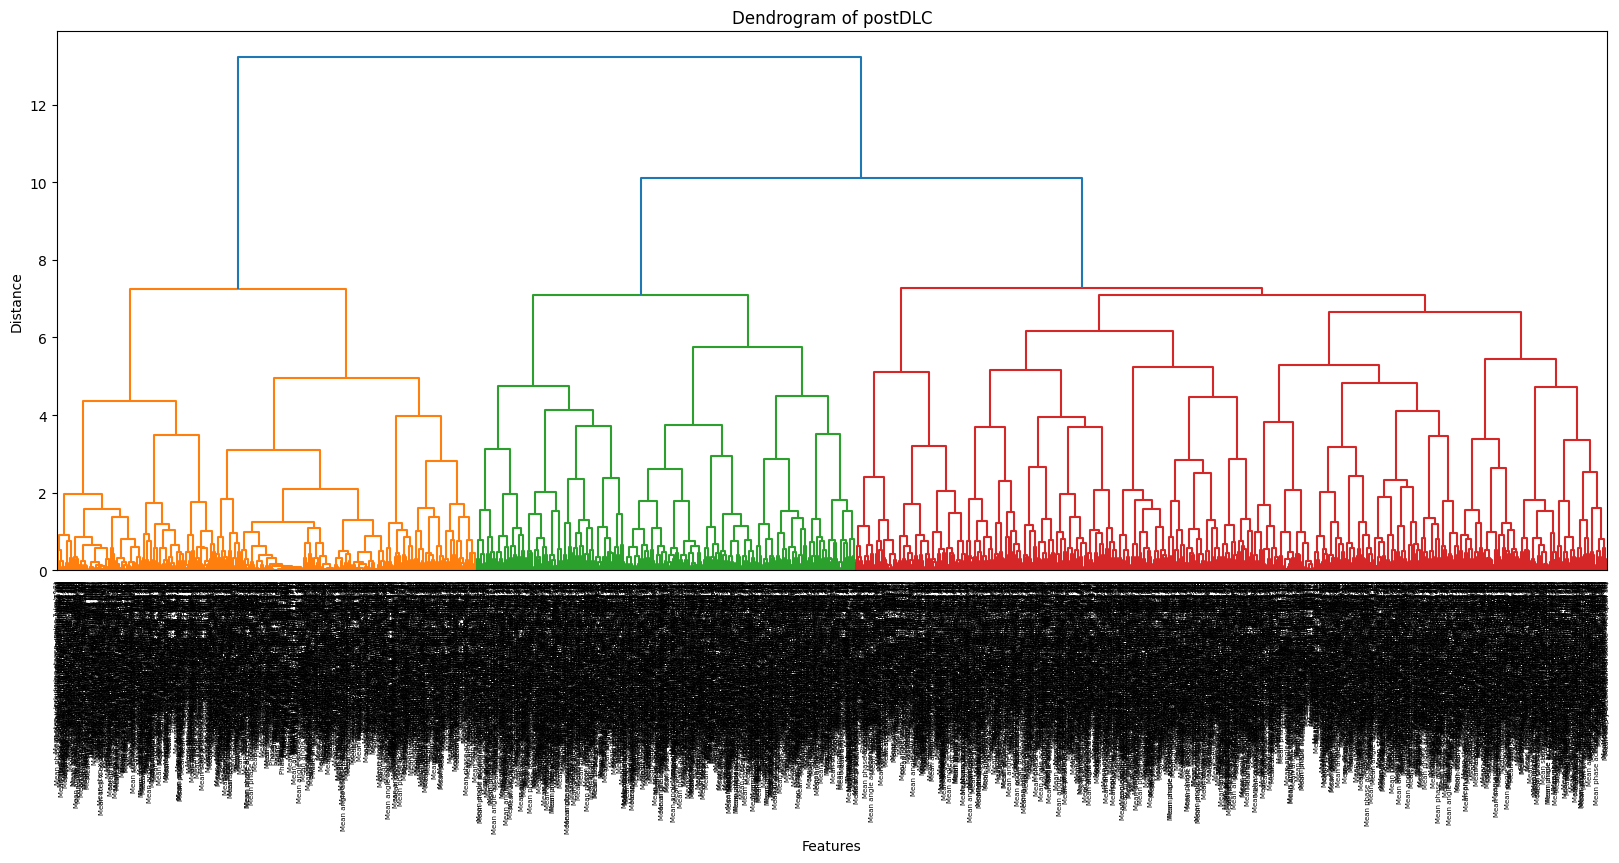

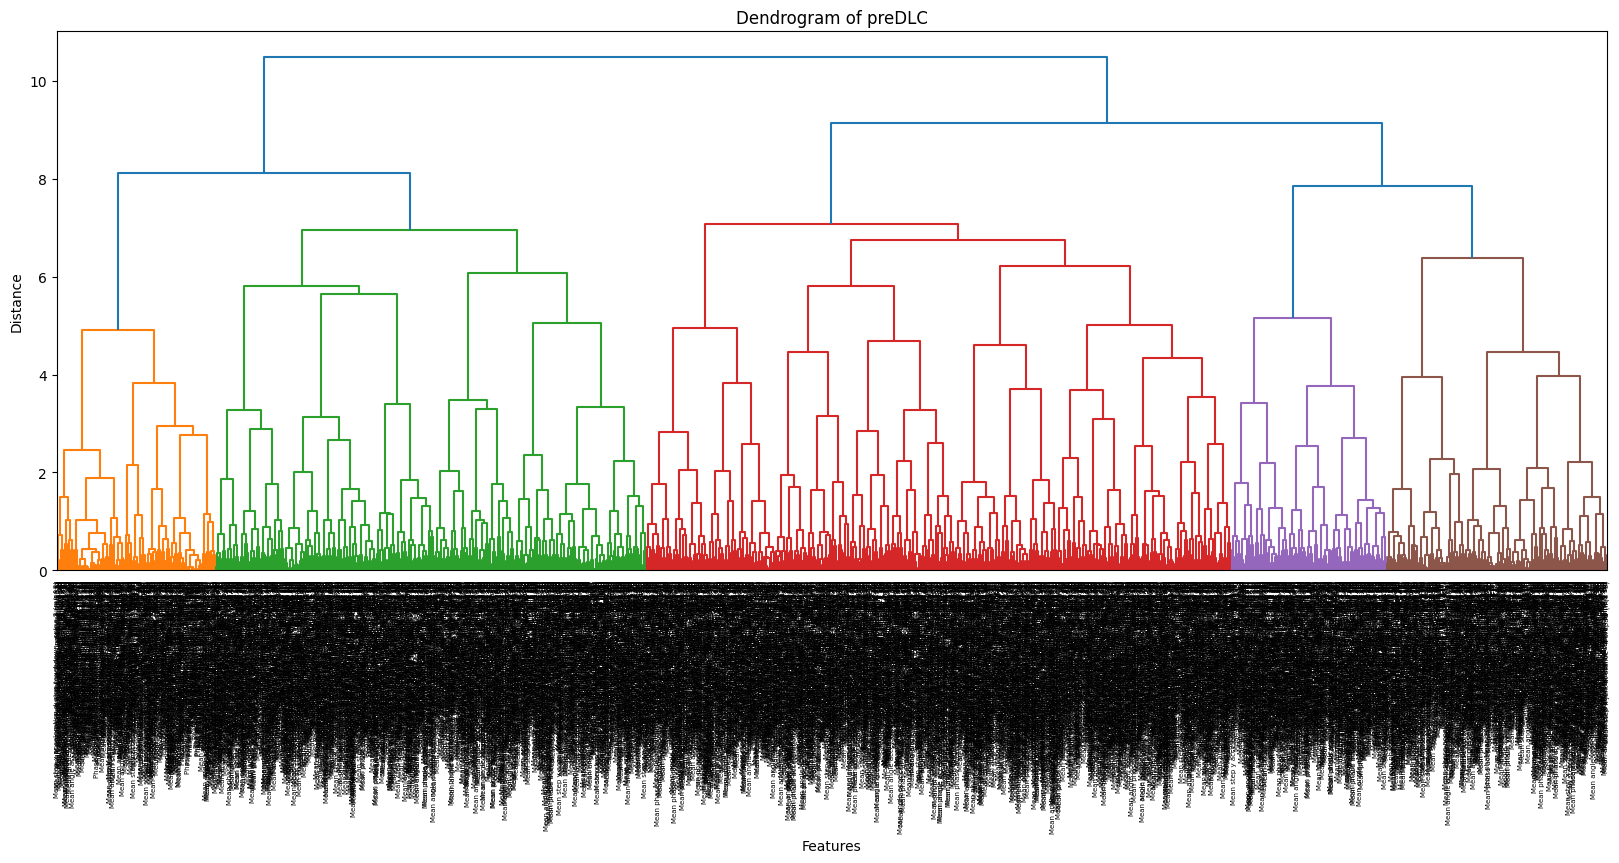

In [22]:
for name in dfs:
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrixes[name], labels=dfs[name].columns, leaf_rotation=90)
    plt.title(f'Dendrogram of {name}')
    plt.xlabel('Features')
    plt.ylabel('Distance')
    plt.show()

    # find a way to cut the tree

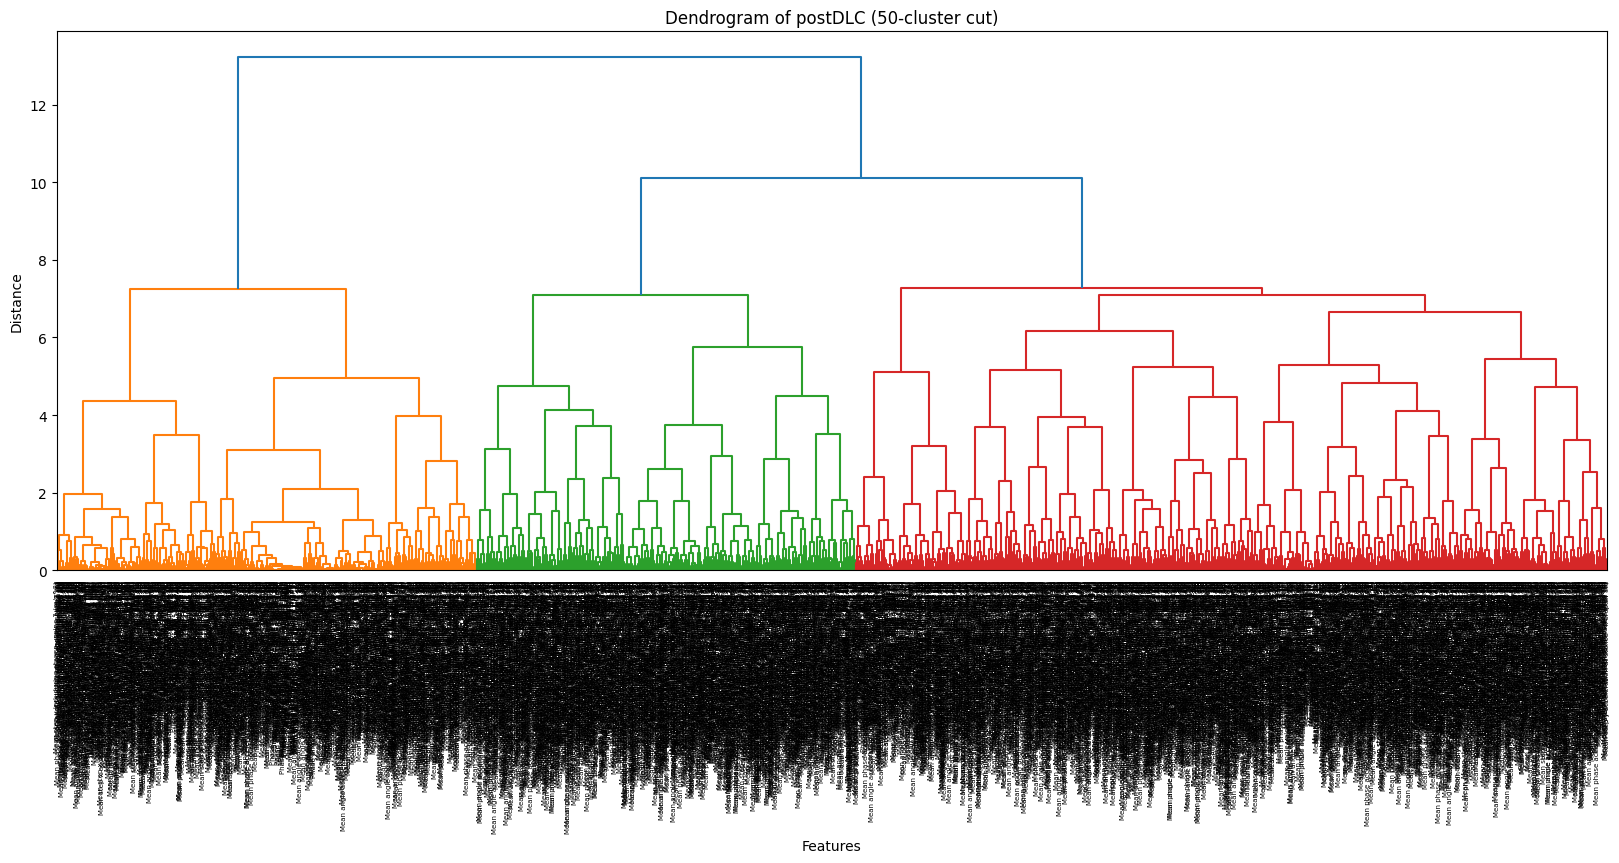

Results for dataset: postDLC
Lasso Coefficients (after thresholding):
Cluster_1: 0.0000
Cluster_2: 0.0000
Cluster_3: 0.0000
Cluster_4: 0.0000
Cluster_5: 0.0000
Cluster_6: 0.0000
Cluster_7: 0.0000
Cluster_8: 0.0000
Cluster_9: 0.0000
Cluster_10: 0.0000
Cluster_11: 0.0000
Cluster_12: 0.0000
Cluster_13: 0.0000
Cluster_14: 0.0000
Cluster_15: 0.0000
Cluster_16: 0.0000
Cluster_17: 0.0000
Cluster_18: 0.0000
Cluster_19: 0.0000
Cluster_20: 0.0000
Cluster_21: 0.0000
Cluster_22: 0.0000
Cluster_23: 0.0000
Cluster_24: 0.0000
Cluster_25: 0.0000
Cluster_26: 0.0000
Cluster_27: 0.0000
Cluster_28: 0.0000
Cluster_29: 0.0000
Cluster_30: 0.0000
Cluster_31: 0.0000
Cluster_32: 0.0000
Cluster_33: 0.0000
Cluster_34: 0.0000
Cluster_35: 0.0000
Cluster_36: 0.0000
Cluster_37: 0.0000
Cluster_38: 0.0000
Cluster_39: 0.0000
Cluster_40: 0.0000
Cluster_41: 0.0000
Cluster_42: 0.0000
Cluster_43: 0.0000
Cluster_44: 0.0000
Cluster_45: 0.0000
Cluster_46: 0.0000
Cluster_47: 0.0000
Cluster_48: 0.0000
Cluster_49: 0.0000
Cluster_

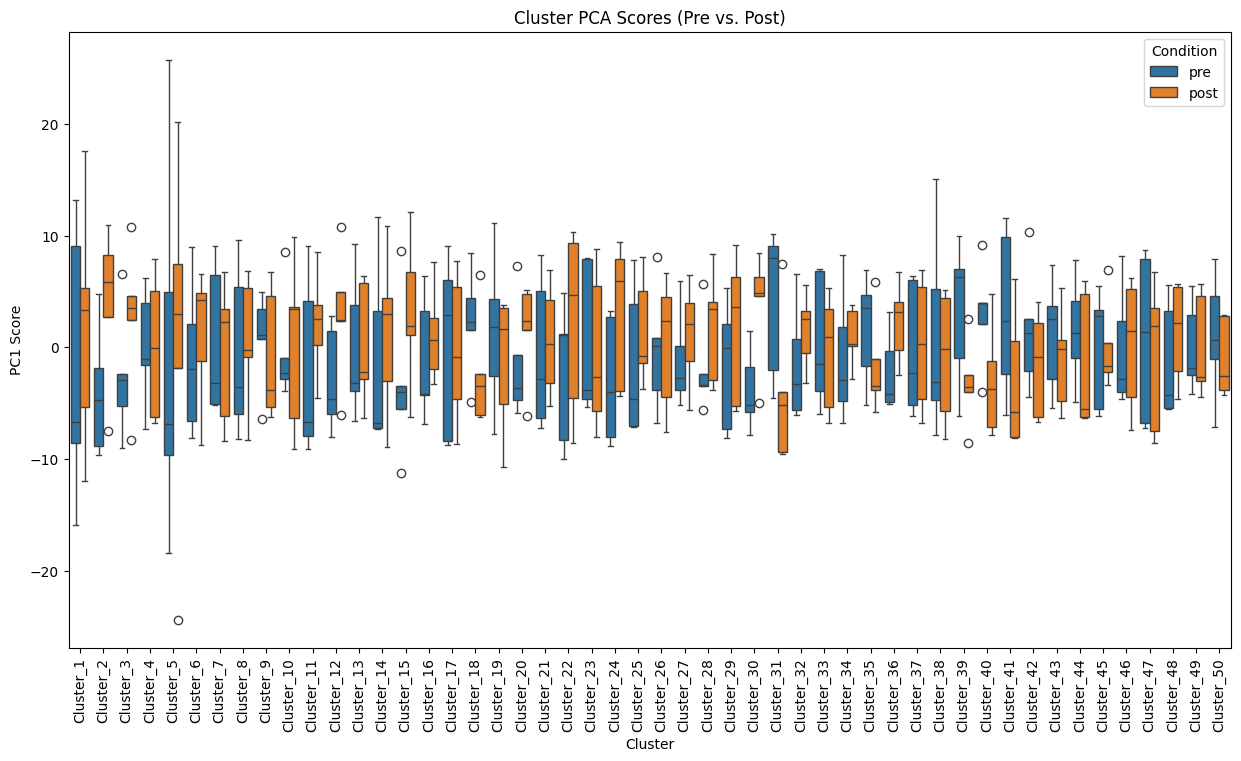

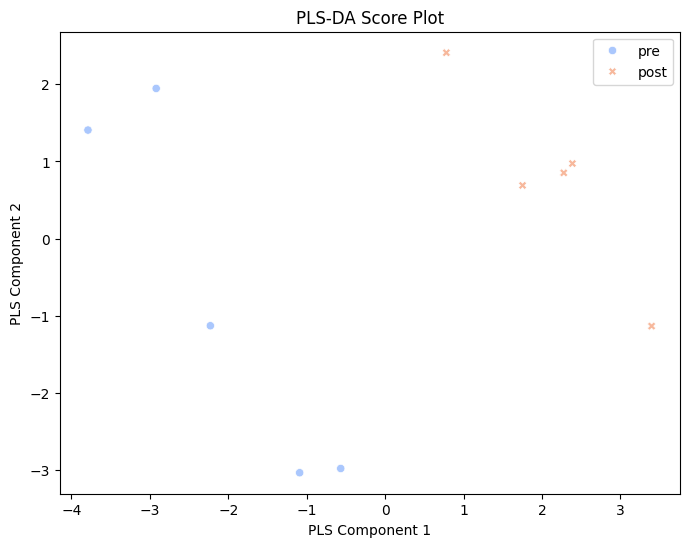

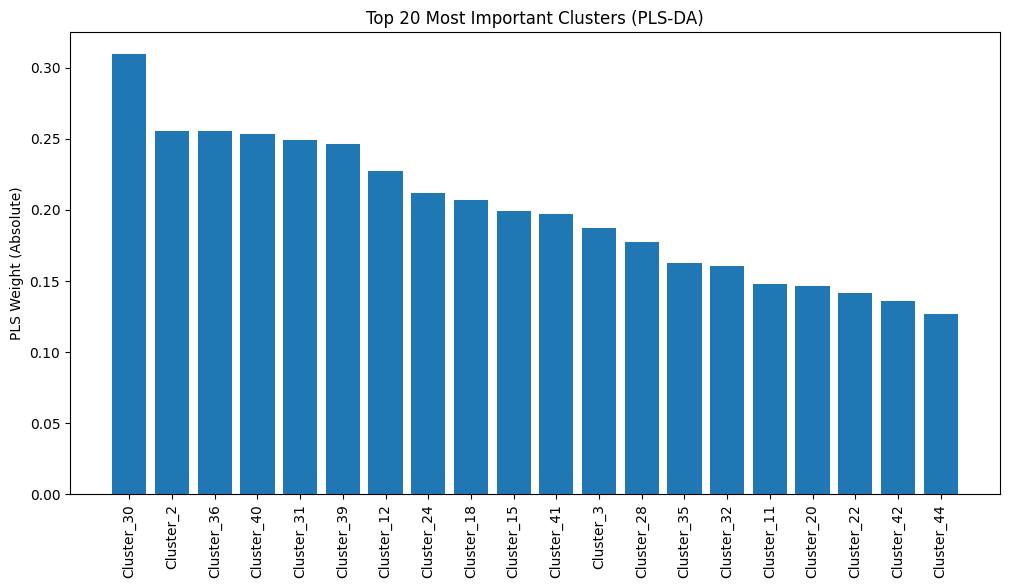

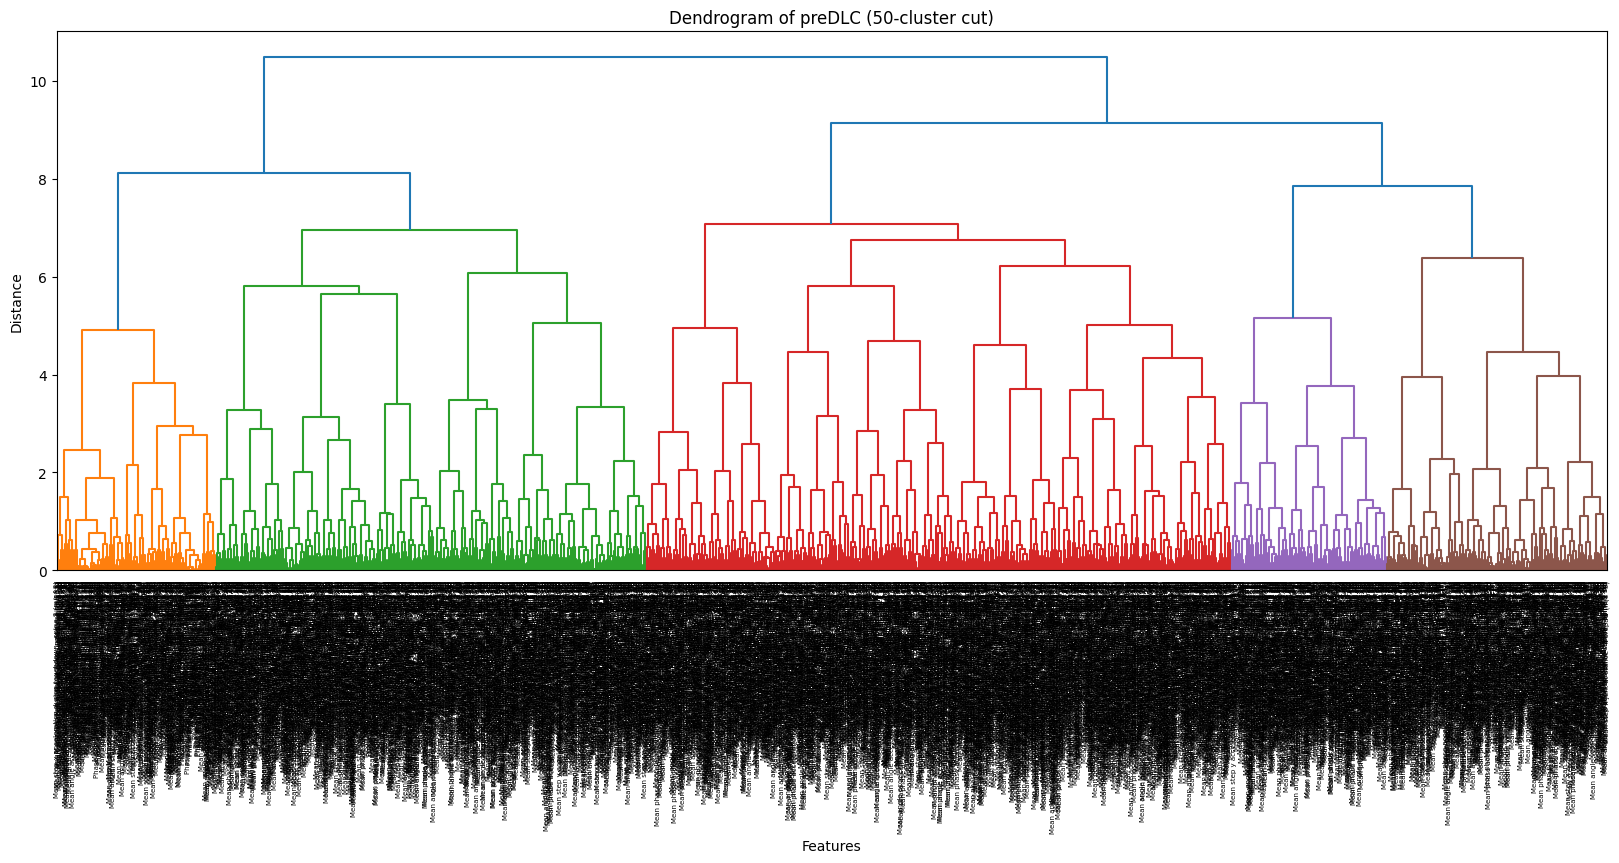

Results for dataset: preDLC
Lasso Coefficients (after thresholding):
Cluster_1: 0.0000
Cluster_2: 0.0448
Cluster_3: 0.0000
Cluster_4: 0.0000
Cluster_5: -0.0093
Cluster_6: 0.0000
Cluster_7: 0.0000
Cluster_8: -0.0599
Cluster_9: 0.0156
Cluster_10: 0.0000
Cluster_11: 0.0000
Cluster_12: 0.0000
Cluster_13: 0.0000
Cluster_14: 0.0023
Cluster_15: 0.0000
Cluster_16: 0.0000
Cluster_17: 0.0000
Cluster_18: 0.0000
Cluster_19: 0.0000
Cluster_20: 0.0000
Cluster_21: 0.0000
Cluster_22: 0.0000
Cluster_23: 0.0000
Cluster_24: 0.0000
Cluster_25: 0.0000
Cluster_26: 0.0000
Cluster_27: 0.0090
Cluster_28: 0.0000
Cluster_29: 0.0000
Cluster_30: 0.0000
Cluster_31: 0.0000
Cluster_32: 0.0000
Cluster_33: 0.0000
Cluster_34: 0.0000
Cluster_35: 0.0000
Cluster_36: 0.0000
Cluster_37: 0.0000
Cluster_38: 0.0000
Cluster_39: 0.0000
Cluster_40: 0.0000
Cluster_41: 0.0000
Cluster_42: 0.0000
Cluster_43: 0.0000
Cluster_44: 0.0000
Cluster_45: 0.0000
Cluster_46: 0.0000
Cluster_47: 0.0050
Cluster_48: 0.0000
Cluster_49: -0.0070
Cluste

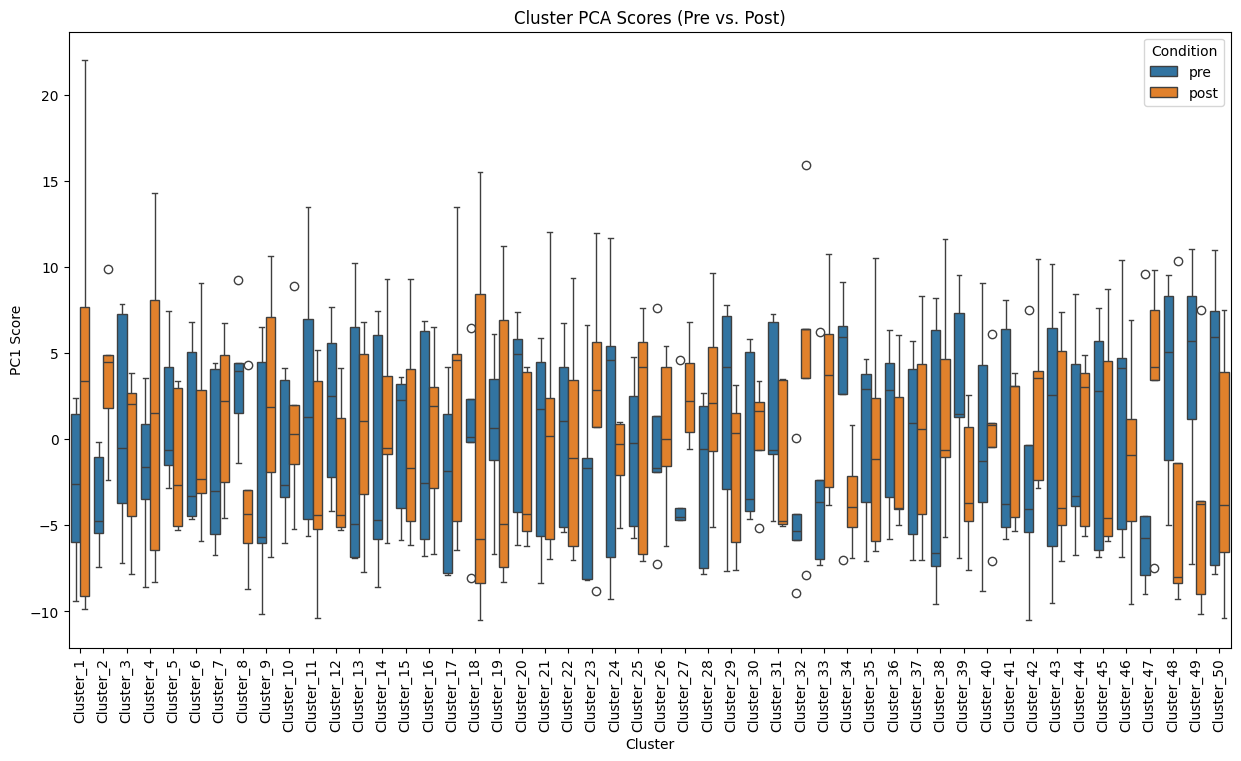

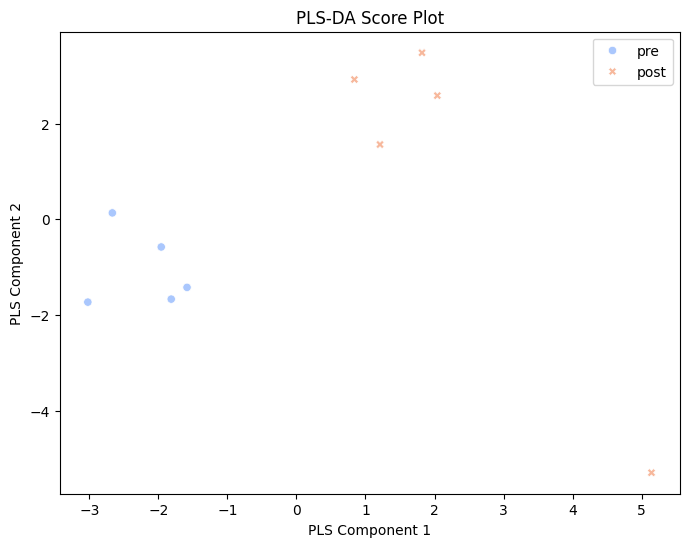

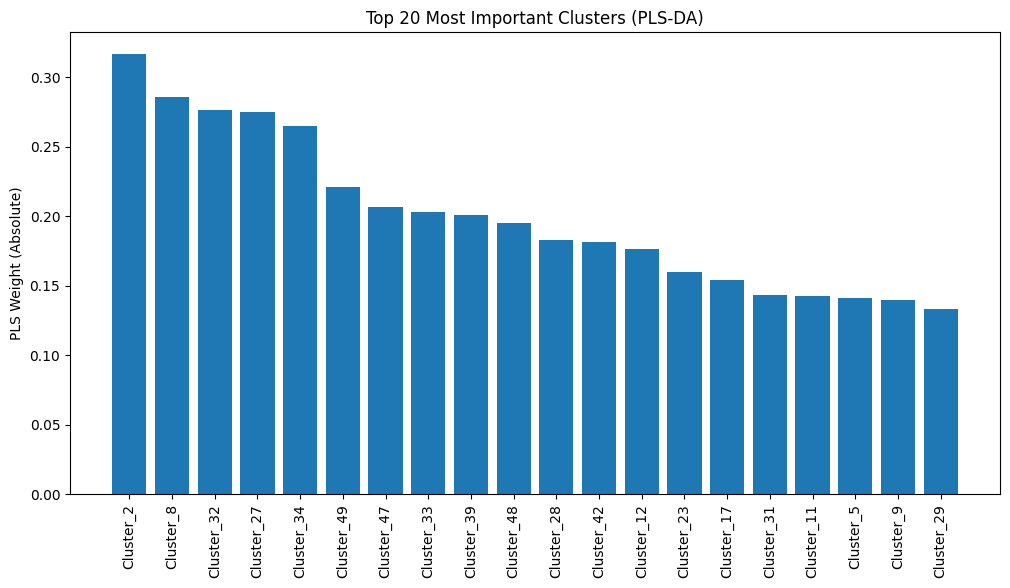

In [23]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LassoCV
from scipy.stats import ttest_ind

clustered_data = {}       # Will hold the new 50-cluster features for each dataset
t_test_results = {}       # Will hold the t-test p-values for each cluster

# For each dataframe in your dictionary:
for name, df in dfs.items():
    # Remove non-feature columns if they exist
    columns_to_drop = ["Dataset", "Mouse", "Number of runs (#)", "Number of steps (#)"]
    columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    df = df.drop(columns=columns_to_drop)
    
    # Standardize the features
    df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    
    # Compute the Spearman correlation matrix and distance matrix
    corr_matrix = df_std.corr(method="spearman")
    distance_matrix = 1 - np.abs(corr_matrix)
    # Convert to condensed distance matrix format (required for linkage)
    distance_condensed = squareform(distance_matrix)
    
    # Hierarchical clustering with Ward's method
    linkage_matrix = linkage(distance_condensed, method="ward")
    
    # Instead of using a distance threshold, cut the dendrogram to form 50 clusters
    clusters = fcluster(linkage_matrix, t=50, criterion='maxclust')
    
    # Create a dataframe mapping features to clusters
    feature_cluster_map = pd.DataFrame({"Feature": df_std.columns, "Cluster": clusters})
    
    # Optionally, plot the dendrogram (if desired)
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, labels=df_std.columns, leaf_rotation=90)
    plt.title(f'Dendrogram of {name} (50-cluster cut)')
    plt.xlabel('Features')
    plt.ylabel('Distance')
    plt.show()
    
    # For each of the 50 clusters, compute the first principal component
    cluster_pcs = pd.DataFrame(index=df_std.index)
    for clust in np.unique(clusters):
        # Get list of features belonging to the current cluster
        features_in_cluster = feature_cluster_map[feature_cluster_map["Cluster"] == clust]["Feature"].tolist()
        sub_df = df_std[features_in_cluster]
        
        # Perform PCA on the subset. We take the first principal component.
        pca = PCA(n_components=1)
        pc1 = pca.fit_transform(sub_df)
        # Save as a new column – name it according to the cluster id
        cluster_pcs[f"Cluster_{clust}"] = pc1.ravel()
    
    clustered_data[name] = cluster_pcs
    
    # Create labels: first half are 'pre', second half are 'post'
    num_samples = cluster_pcs.shape[0]
    y = np.array(["pre"]*(num_samples//2) + ["post"]*(num_samples - num_samples//2))
    
    # --- Step: Sparse modeling to shrink less informative clusters ---
    # One approach is to use Lasso to see which clusters (features) are most predictive.
    # For this, we need to convert the labels to a binary format:
    y_binary = np.where(y=="pre", 0, 1)
    
    # Here we use Lasso with cross-validation to select features.
    # (Note: this is a surrogate for “shrinking” less informative clusters toward zero.)
    from sklearn.linear_model import LassoCV
    lasso = LassoCV(cv=5, random_state=42).fit(cluster_pcs, y_binary)
    # Get the coefficients and set those with very small values to zero (threshold can be tuned)
    coef_threshold = 1e-3
    lasso_coefs = lasso.coef_
    lasso_coefs[np.abs(lasso_coefs) < coef_threshold] = 0
    
    # Alternatively, one might use a sparse PLS-DA implementation if available.
    # Here, we demonstrate using PLSRegression as a proxy.
    pls = PLSRegression(n_components=2)
    pls.fit(cluster_pcs, y_binary)
    # For interpretability, we examine the loadings (pls.x_weights_)
    pls_loadings = pls.x_weights_
    pls_scores = pls.x_scores_
    
    # --- Step: Statistical testing ---
    # Perform a t-test for each cluster (i.e. for each column in cluster_pcs)
    p_values = {}
    for col in cluster_pcs.columns:
        pre_values = cluster_pcs.loc[y=="pre", col]
        post_values = cluster_pcs.loc[y=="post", col]
        t_stat, p_val = ttest_ind(pre_values, post_values)
        p_values[col] = p_val
    t_test_results[name] = pd.DataFrame({"Cluster": list(p_values.keys()), "p_value": list(p_values.values())})
    
    # Print or store the results for further inspection:
    print(f"Results for dataset: {name}")
    print("Lasso Coefficients (after thresholding):")
    for idx, col in enumerate(cluster_pcs.columns):
        print(f"{col}: {lasso_coefs[idx]:.4f}")
    print("\nPLS Loadings (first component):")
    for idx, col in enumerate(cluster_pcs.columns):
        print(f"{col}: {pls_loadings[idx, 0]:.4f}")
    print("\nT-test p-values:")
    print(t_test_results[name])

    #  ----- 2. BOX PLOTS OF PCA CLUSTER SCORES (PRE VS. POST) -----
    plt.figure(figsize=(15, 8))
    melted_df = cluster_pcs.copy()
    melted_df["Condition"] = y  # 'pre' for first 10, 'post' for last 10
    melted_df = melted_df.melt(id_vars="Condition", var_name="Cluster", value_name="PC1 Score")
    sns.boxplot(x="Cluster", y="PC1 Score", hue="Condition", data=melted_df)
    plt.xticks(rotation=90)
    plt.title(f'Cluster PCA Scores (Pre vs. Post)')
    plt.show()

    # ----- 3. PLS-DA SCORE PLOT -----
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pls_scores[:, 0], y=pls_scores[:, 1], hue=y, style=y, palette="coolwarm")
    plt.title(f'PLS-DA Score Plot')
    plt.xlabel("PLS Component 1")
    plt.ylabel("PLS Component 2")
    plt.show()

    # ----- 4. PLS-DA VARIABLE IMPORTANCE PLOT -----
    plt.figure(figsize=(12, 6))
    pls_importance = np.abs(pls.x_weights_[:, 0])
    sorted_idx = np.argsort(pls_importance)[::-1]
    sorted_features = np.array(cluster_pcs.columns)[sorted_idx]
    sorted_importance = pls_importance[sorted_idx]

    plt.bar(sorted_features[:20], sorted_importance[:20])  # Top 20 features
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Most Important Clusters (PLS-DA)')
    plt.ylabel('PLS Weight (Absolute)')
    plt.show()


In [24]:
top_n = 10  # Change this number if you want more clusters
important_clusters = sorted_features[:top_n]  # Select top clusters

# Print the original features corresponding to the most important clusters
print("Top Important Clusters and Their Features:")
for cluster in important_clusters:
    cluster_num = int(cluster.replace("Cluster_", ""))  # Extract cluster number
    features_in_cluster = feature_cluster_map[feature_cluster_map["Cluster"] == cluster_num]["Feature"].tolist()
    
    print(f"\nCluster {cluster_num} ({cluster}):")
    for feature in features_in_cluster:
        print(f"  - {feature}")

Top Important Clusters and Their Features:

Cluster 2 (Cluster_2):
  - Mean swing duration std
  - Mean angle excursion - rhindlimb - lHindfingers (°)
  - Mean angle value - spine - head (°)
  - Mean phase value - spine - head (°)
  - Mean step x velocity at stance - hip std
  - Mean step x jerk at stance - spine 1 (m/s^3)
  - Mean step y velocity at swing - spine 2 (m/s)
  - Mean step x velocity at peak - base (m/s)
  - Mean step x jerk at peak - knee (m/s^3)
  - Mean step x velocity at touchdown - head std
  - Mean step y velocity at touchdown - shoulder std
  - Mean step y jerk at touchdown - base std
  - Mean step y jerk during stance - shoulder std
  - Mean step y acceleration during swing - shoulder (m/s^2)
  - Mean step y jerk during swing - spine 2 (m/s^3)
  - Mean step y velocity during touchdown - spine 2 std
  - Mean step y velocity during touchdown - shoulder std
  - Mean step y velocity during touchdown - lForepaw (m/s)
  - Mean step y acceleration during touchdown - spine

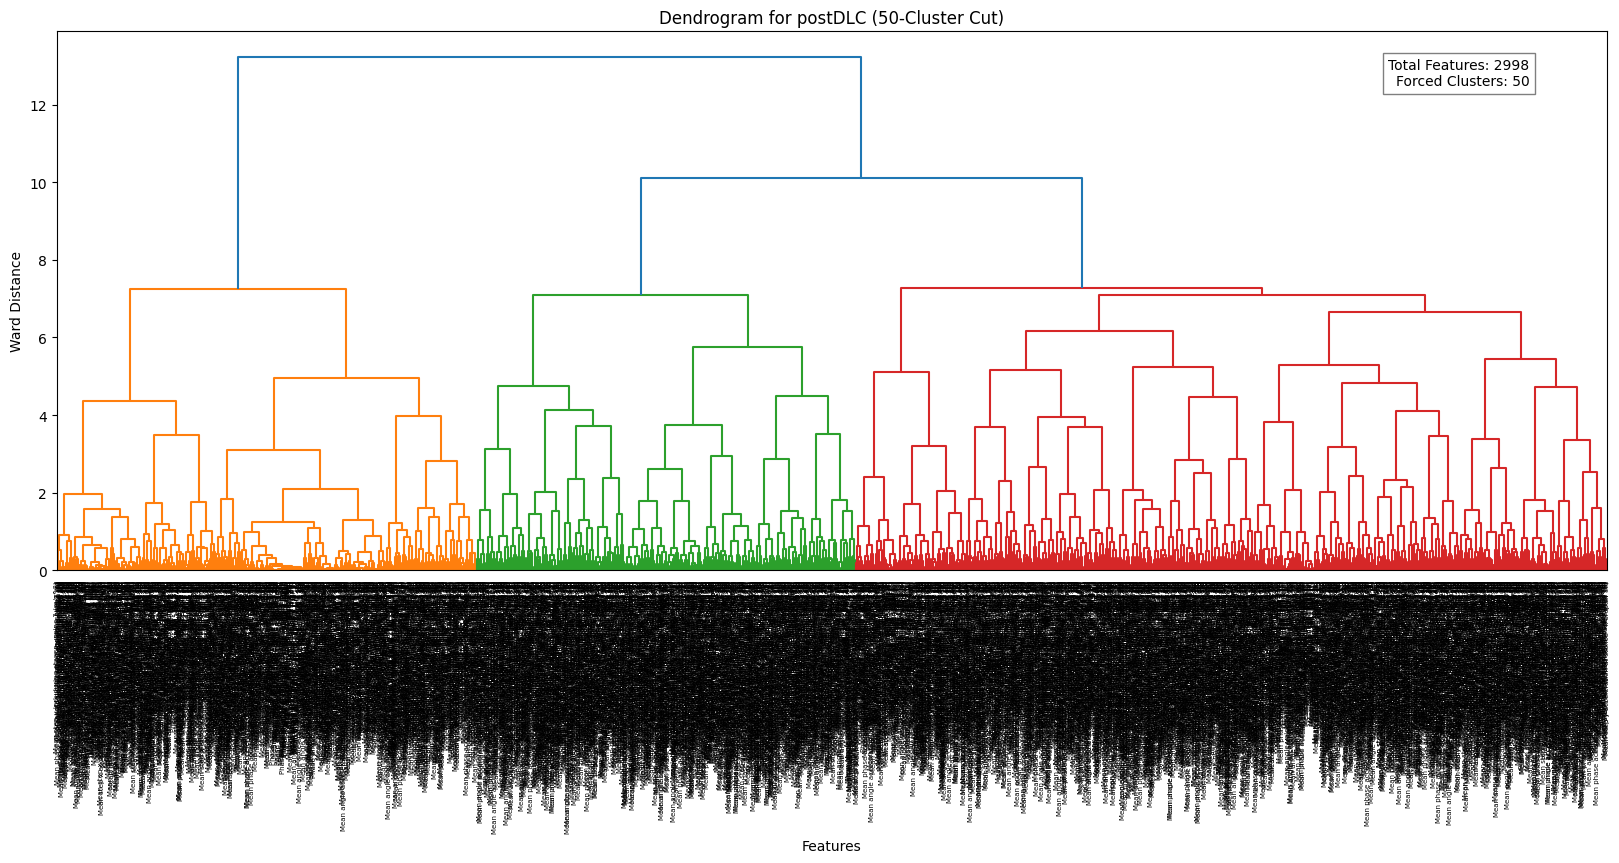

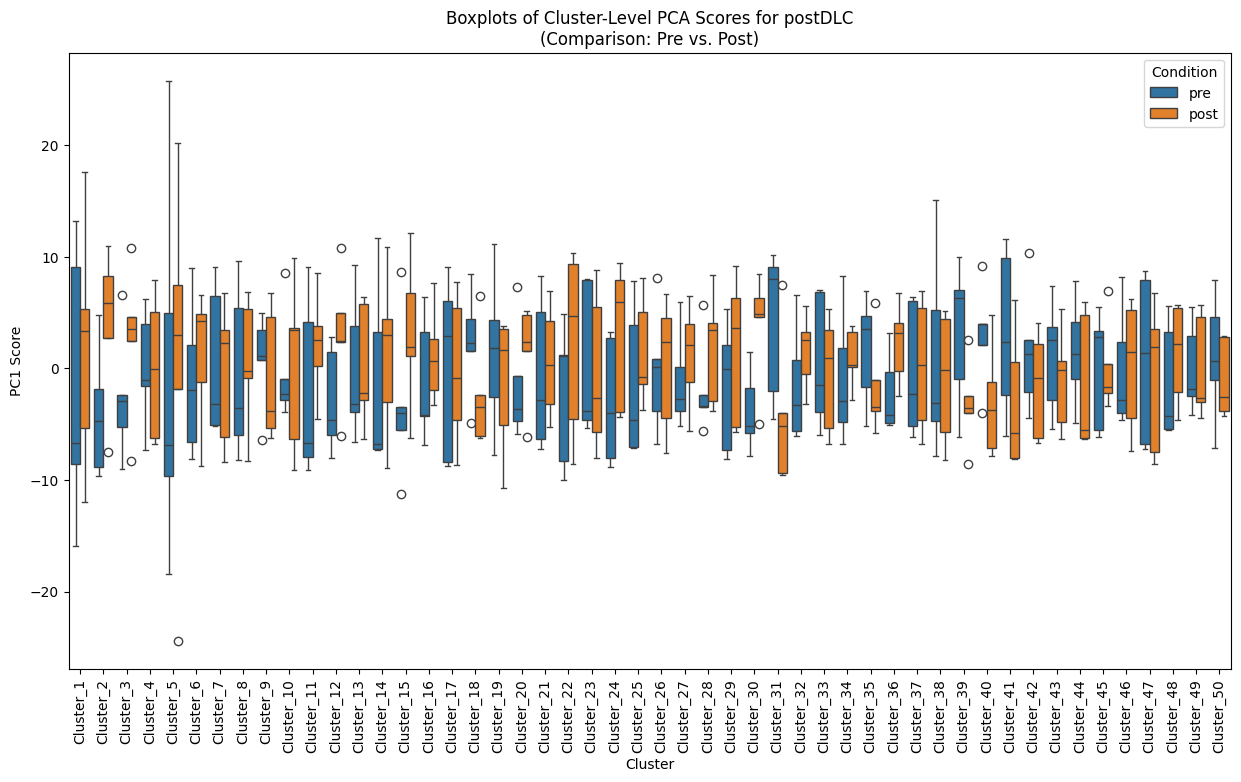

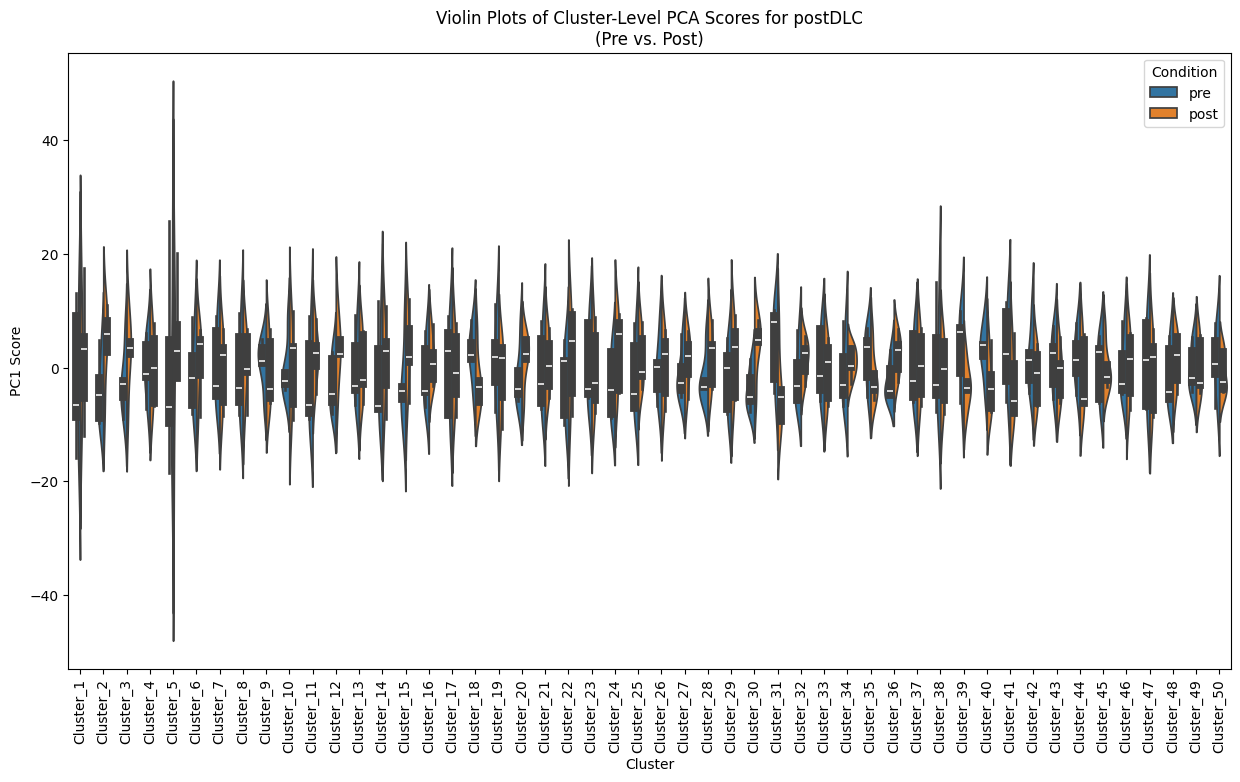

/tmp/ipykernel_38271/371136363.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Num_Features", data=cluster_sizes, palette="viridis")


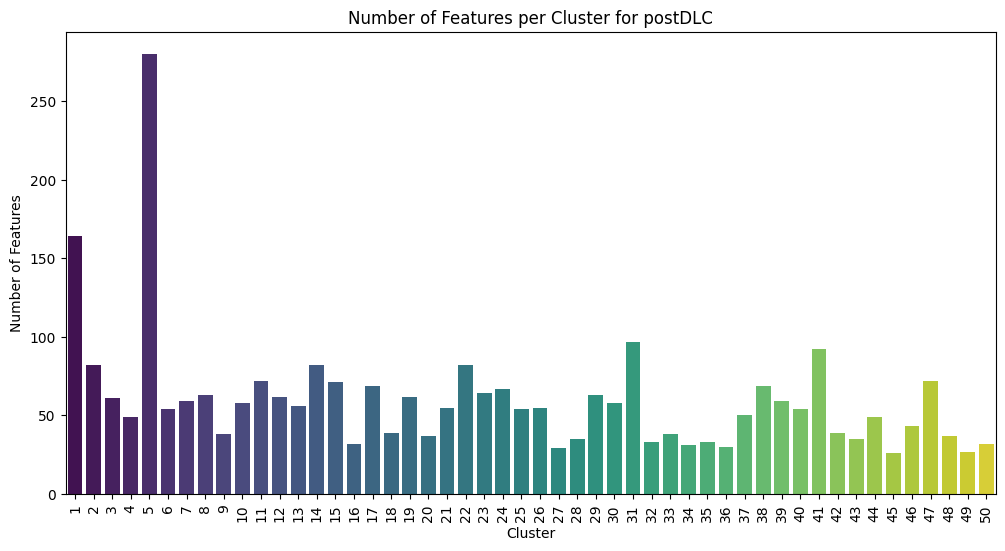

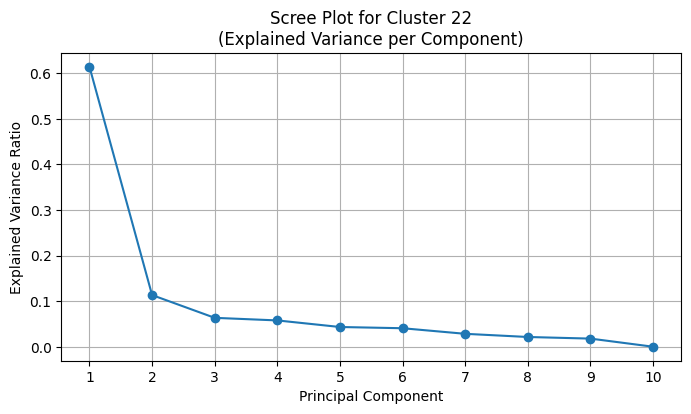

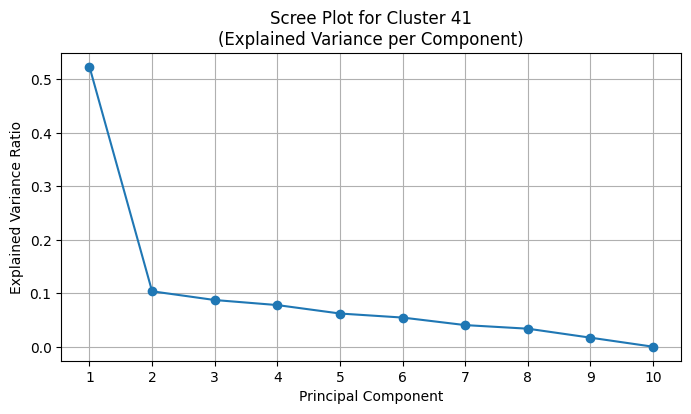

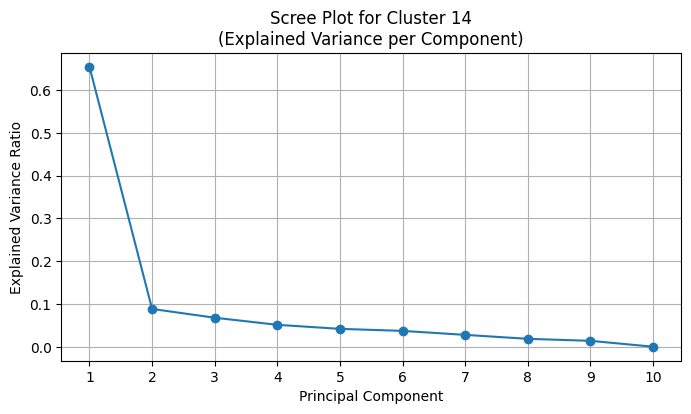

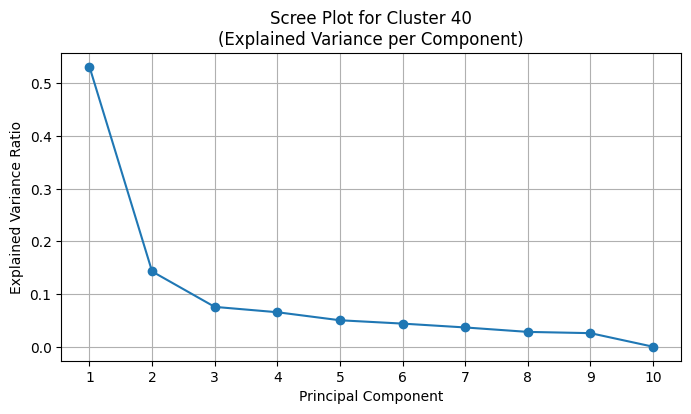

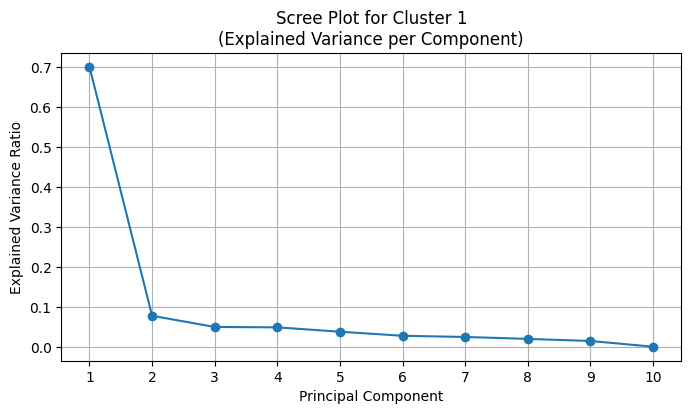

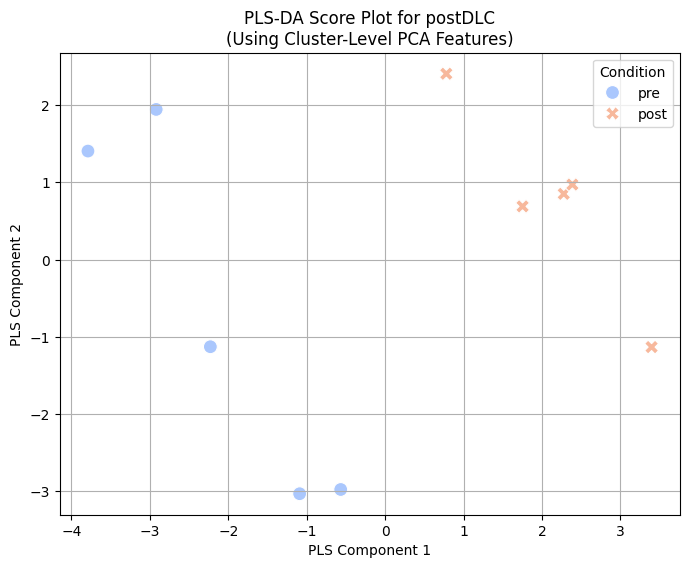

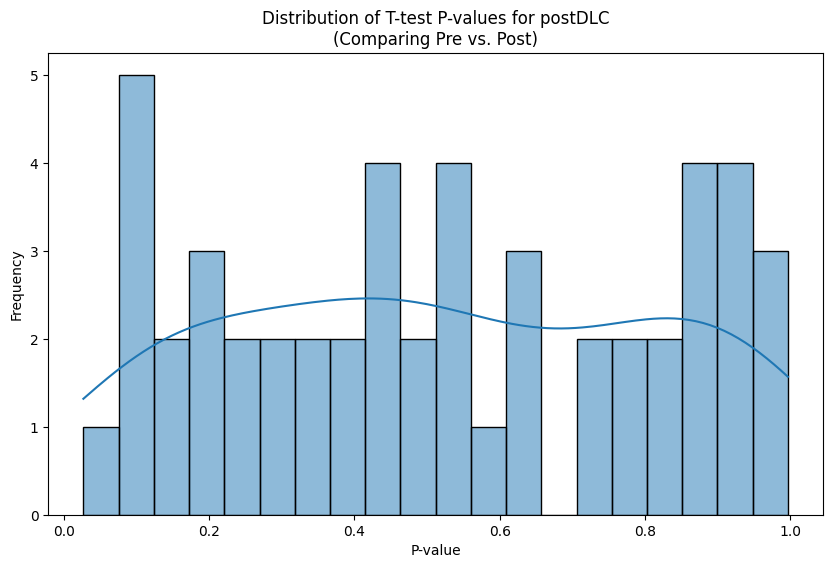


postDLC - Cluster Composition Summary:
 Cluster  Num_Features
       1           164
       2            82
       3            61
       4            49
       5           280
       6            54
       7            59
       8            63
       9            38
      10            58
      11            72
      12            62
      13            56
      14            82
      15            71
      16            32
      17            69
      18            39
      19            62
      20            37
      21            55
      22            82
      23            64
      24            67
      25            54
      26            55
      27            29
      28            35
      29            63
      30            58
      31            97
      32            33
      33            38
      34            31
      35            33
      36            30
      37            50
      38            69
      39            59
      40            54
      41         

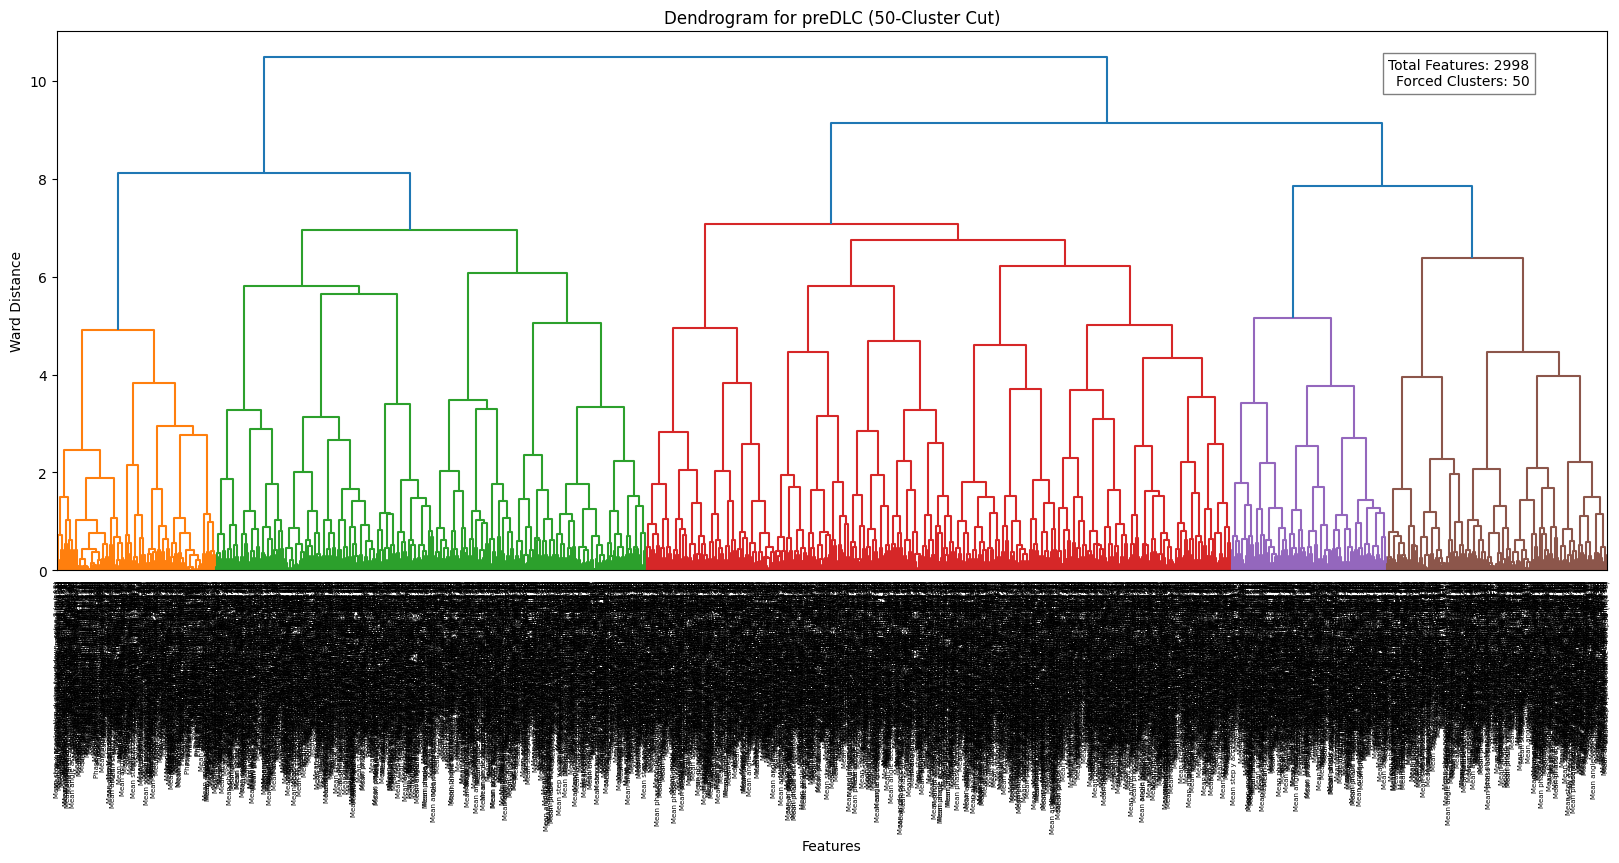

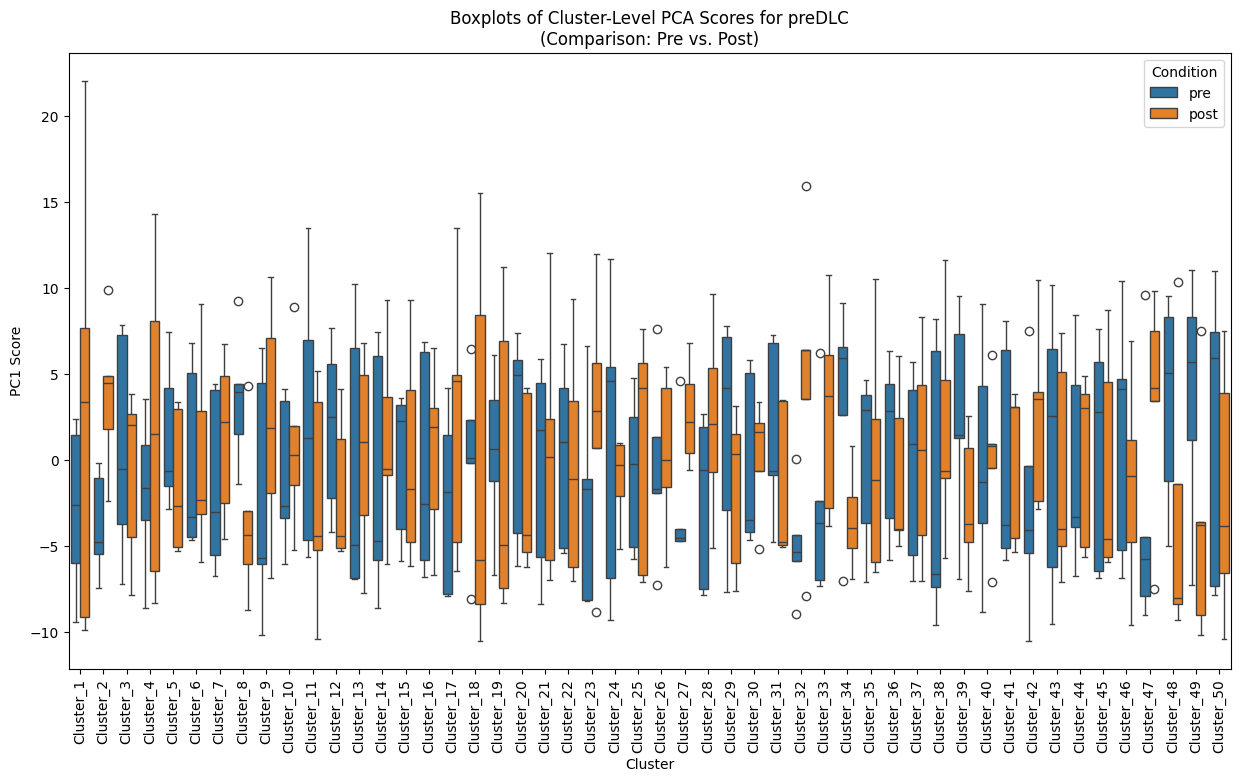

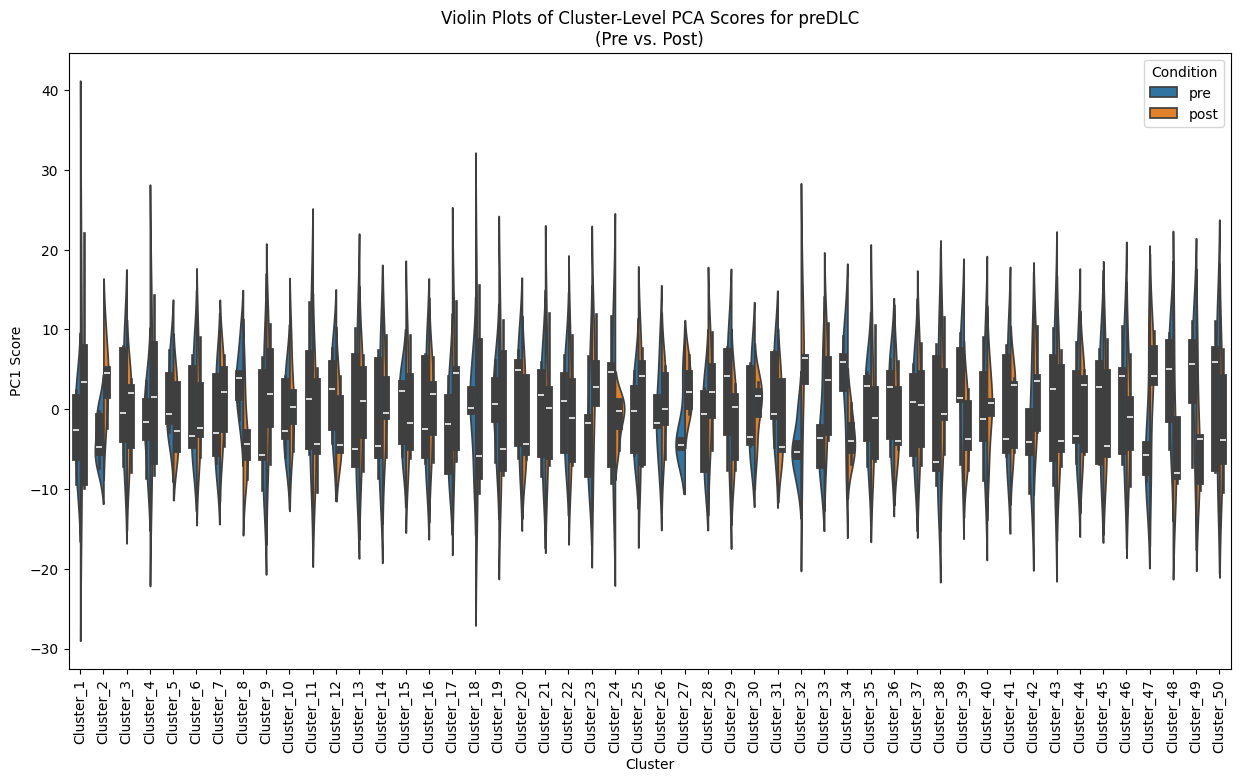

/tmp/ipykernel_38271/371136363.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Num_Features", data=cluster_sizes, palette="viridis")


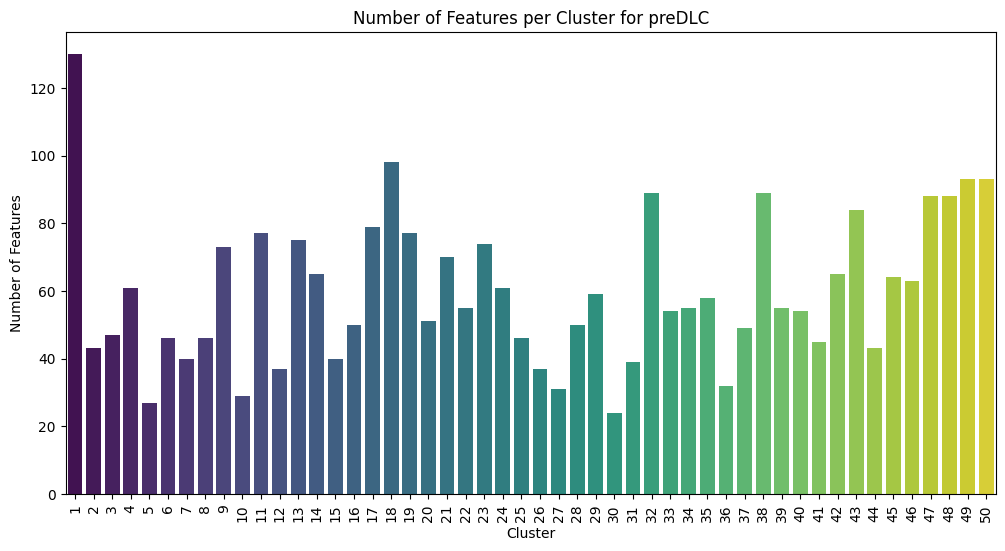

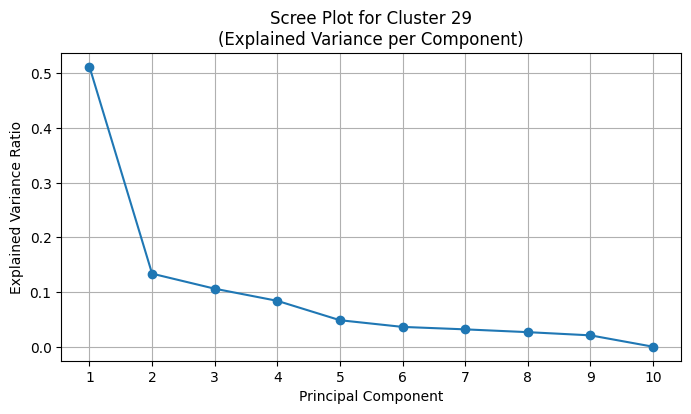

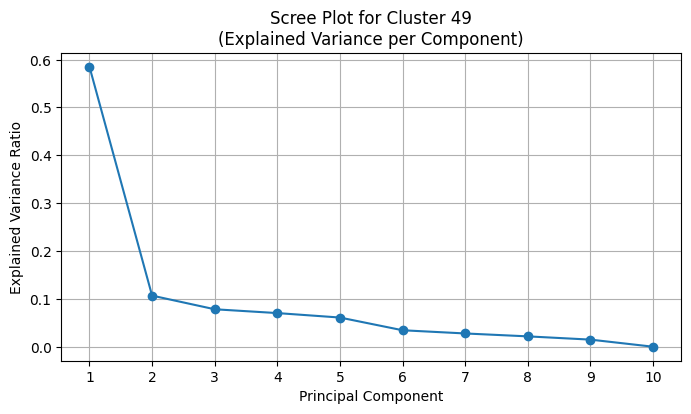

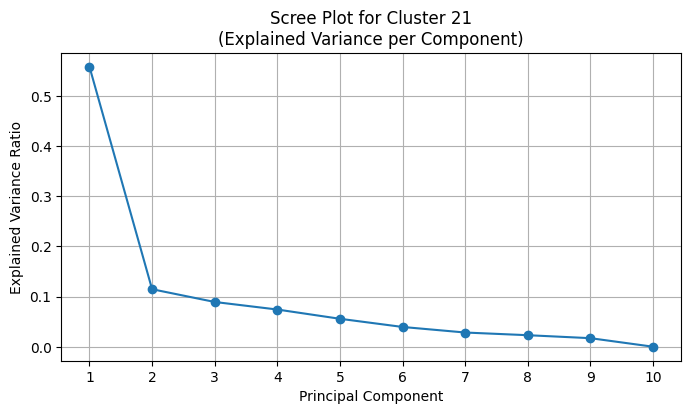

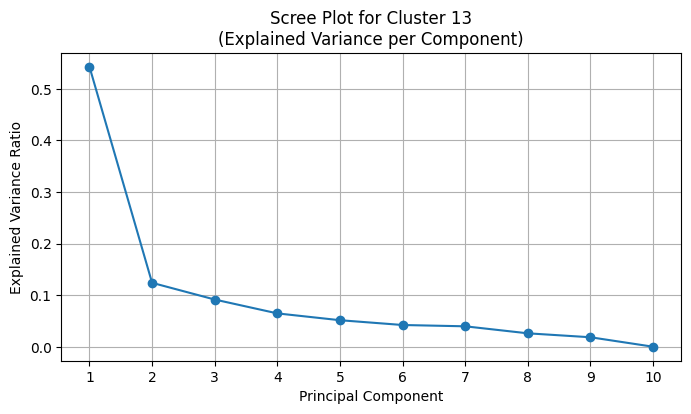

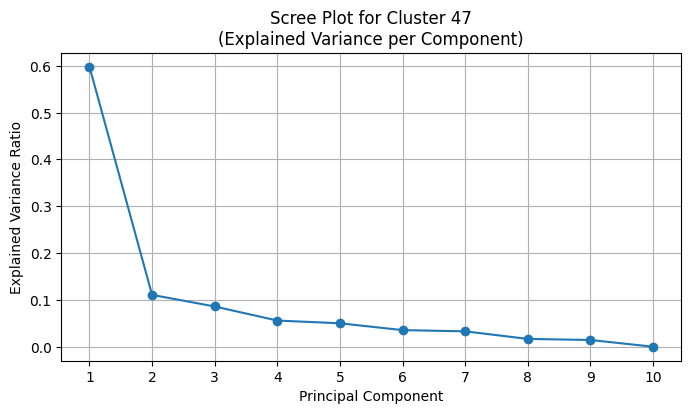

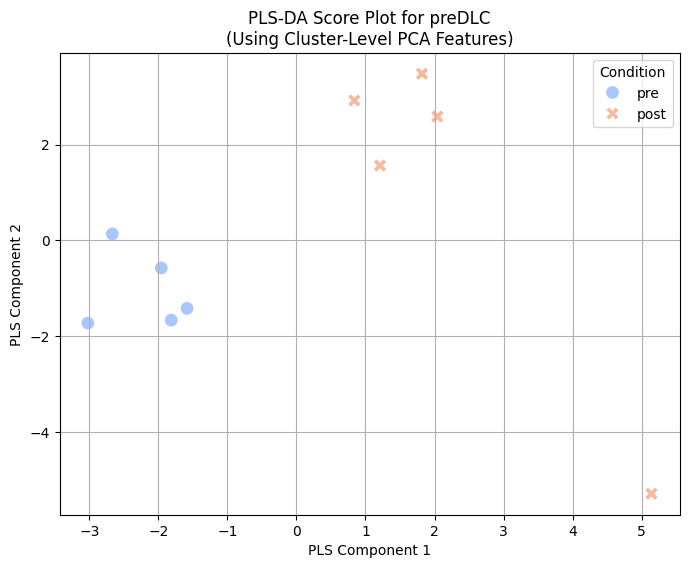

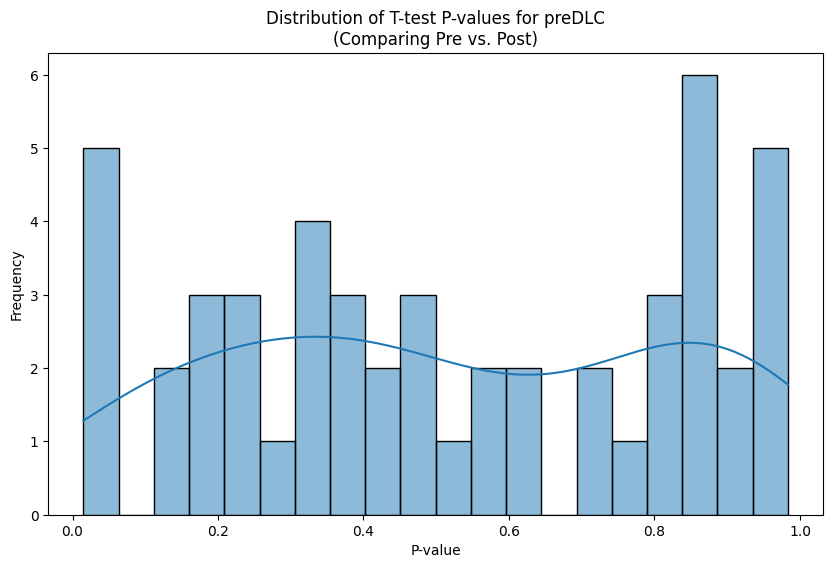


preDLC - Cluster Composition Summary:
 Cluster  Num_Features
       1           130
       2            43
       3            47
       4            61
       5            27
       6            46
       7            40
       8            46
       9            73
      10            29
      11            77
      12            37
      13            75
      14            65
      15            40
      16            50
      17            79
      18            98
      19            77
      20            51
      21            70
      22            55
      23            74
      24            61
      25            46
      26            37
      27            31
      28            50
      29            59
      30            24
      31            39
      32            89
      33            54
      34            55
      35            58
      36            32
      37            49
      38            89
      39            55
      40            54
      41          

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assume dfs is your dictionary of dataframes
# Example: dfs = {"Dataset1": pd.read_csv("your_file.csv"), ...}
# The keys in dfs should correspond to dataset names.

# Initialize a StandardScaler instance.
scaler = StandardScaler()

# Dictionaries to store intermediate and final results.
correlation_matrixes = {}
distance_matrixes = {}
linkage_matrixes = {}
num_clusters = {}
feature_clusters = {}
clustered_data = {}  # This will hold the cluster-level PCA data.

for name, df in dfs.items():
    # --- Step 1: Preprocessing & Clustering ---
    # Drop non-feature columns if present.
    columns_to_drop = ["Dataset", "Mouse", "Number of runs (#)", "Number of steps (#)"]
    columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    df = df.drop(columns=columns_to_drop)
    
    # Standardize the features.
    df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    
    # Compute Spearman correlation matrix.
    corr_matrix = df_std.corr(method="spearman")
    correlation_matrixes[name] = corr_matrix
    
    # Create a distance matrix as 1 - |correlation|.
    distance_matrix = 1 - np.abs(corr_matrix)
    # Convert the full distance matrix to condensed form for linkage.
    distance_condensed = squareform(distance_matrix)
    distance_matrixes[name] = distance_condensed
    
    # Perform hierarchical clustering with Ward's method.
    linkage_matrix = linkage(distance_condensed, method="ward")
    linkage_matrixes[name] = linkage_matrix
    
    # Form flat clusters, forcing exactly 50 clusters using the maxclust criterion.
    clusters = fcluster(linkage_matrix, t=50, criterion='maxclust')
    num_clusters[name] = clusters
    
    # Map each feature to its assigned cluster.
    fc = pd.DataFrame({"Feature": df_std.columns, "Cluster": clusters})
    feature_clusters[name] = fc
    
    # --- Step 2: PCA on Each Cluster ---
    # For each cluster, extract the first principal component as the summary feature.
    cluster_pcs = pd.DataFrame(index=df_std.index)
    for clust in np.unique(clusters):
        # Get features belonging to the current cluster.
        features_in_cluster = fc[fc["Cluster"] == clust]["Feature"].tolist()
        sub_df = df_std[features_in_cluster]
        
        # Run PCA on the cluster data (using one component).
        pca = PCA(n_components=1)
        pc1 = pca.fit_transform(sub_df)
        cluster_pcs[f"Cluster_{clust}"] = pc1.ravel()
    
    # Save the cluster-level (PCA summary) data.
    clustered_data[name] = cluster_pcs

    # --- Visualization Section ---
    # 1. Dendrogram with additional annotations.
    plt.figure(figsize=(20, 7))
    dendro = dendrogram(linkage_matrix, labels=df_std.columns, leaf_rotation=90, color_threshold=0.7 * max(linkage_matrix[:,2]))
    plt.title(f'Dendrogram for {name} (50-Cluster Cut)')
    plt.xlabel('Features')
    plt.ylabel('Ward Distance')
    # Annotate: display total number of features and clusters.
    total_features = len(df_std.columns)
    plt.text(0.95, 0.95, f"Total Features: {total_features}\nForced Clusters: 50", 
             horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

    # 2. Boxplots of the cluster-level PCA scores.
    # Here, we assume that the first half of the rows are 'pre' and the second half are 'post'.
    num_samples = cluster_pcs.shape[0]
    y = np.array(["pre"] * (num_samples // 2) + ["post"] * (num_samples // 2))
    cluster_pcs_viz = cluster_pcs.copy()
    cluster_pcs_viz["Condition"] = y
    melted_df = cluster_pcs_viz.melt(id_vars="Condition", var_name="Cluster", value_name="PC1 Score")
    
    plt.figure(figsize=(15, 8))
    sns.boxplot(x="Cluster", y="PC1 Score", hue="Condition", data=melted_df)
    plt.xticks(rotation=90)
    plt.title(f'Boxplots of Cluster-Level PCA Scores for {name}\n(Comparison: Pre vs. Post)')
    plt.xlabel("Cluster")
    plt.ylabel("PC1 Score")
    plt.legend(title="Condition")
    plt.show()
    
    # 3. Violin plots of the cluster-level PCA scores.
    plt.figure(figsize=(15, 8))
    sns.violinplot(x="Cluster", y="PC1 Score", hue="Condition", data=melted_df, split=True)
    plt.xticks(rotation=90)
    plt.title(f'Violin Plots of Cluster-Level PCA Scores for {name}\n(Pre vs. Post)')
    plt.xlabel("Cluster")
    plt.ylabel("PC1 Score")
    plt.legend(title="Condition")
    plt.show()
    
    # 4. Cluster size bar chart.
    cluster_sizes = fc.groupby("Cluster").size().reset_index(name="Num_Features")
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Cluster", y="Num_Features", data=cluster_sizes, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f'Number of Features per Cluster for {name}')
    plt.xlabel("Cluster")
    plt.ylabel("Number of Features")
    plt.show()
    
    # 5. Scree plots for a subset of clusters (first 5 clusters with >1 feature)
    clusters_with_multiple = fc.groupby("Cluster").filter(lambda x: len(x) > 1)["Cluster"].unique()
    clusters_to_plot = clusters_with_multiple[:5]  # first 5 clusters with more than one feature
    for clust in clusters_to_plot:
        features_in_cluster = fc[fc["Cluster"] == clust]["Feature"].tolist()
        sub_df = df_std[features_in_cluster]
        pca_full = PCA(n_components=min(len(features_in_cluster), sub_df.shape[0], sub_df.shape[1]))
        pca_full.fit(sub_df)
        exp_var = pca_full.explained_variance_ratio_
        plt.figure(figsize=(8, 4))
        plt.plot(range(1, len(exp_var)+1), exp_var, marker='o')
        plt.title(f'Scree Plot for Cluster {clust}\n(Explained Variance per Component)')
        plt.xlabel("Principal Component")
        plt.ylabel("Explained Variance Ratio")
        plt.xticks(range(1, len(exp_var)+1))
        plt.grid(True)
        plt.show()
    
    # 6. PLS-DA Score Plot (Using PLSRegression as a surrogate for PLS-DA)
    # Convert "pre" and "post" to binary labels (0 for pre, 1 for post)
    y_binary = np.where(y=="pre", 0, 1)
    pls = PLSRegression(n_components=2)
    pls.fit(cluster_pcs, y_binary)
    pls_scores = pls.transform(cluster_pcs)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pls_scores[:, 0], y=pls_scores[:, 1], hue=y, style=y, palette="coolwarm", s=100)
    plt.title(f'PLS-DA Score Plot for {name}\n(Using Cluster-Level PCA Features)')
    plt.xlabel("PLS Component 1")
    plt.ylabel("PLS Component 2")
    plt.legend(title="Condition")
    plt.grid(True)
    plt.show()
    
    # 7. T-test p-value distribution across clusters.
    plt.figure(figsize=(10, 6))
    sns.histplot(t_test_results[name]["p_value"], bins=20, kde=True)
    plt.title(f'Distribution of T-test P-values for {name}\n(Comparing Pre vs. Post)')
    plt.xlabel("P-value")
    plt.ylabel("Frequency")
    plt.show()

    # Print a summary of the number of features in each cluster.
    cluster_summary = fc.groupby("Cluster").size().reset_index(name="Num_Features")
    print(f"\n{name} - Cluster Composition Summary:")
    print(cluster_summary.sort_values(by="Cluster").to_string(index=False))
    
    # Optionally, list the features in the top clusters if needed:
    # For example, you can print the features of the first top cluster.
    top_cluster = cluster_summary.iloc[0]["Cluster"]
    features_top_cluster = fc[fc["Cluster"] == top_cluster]["Feature"].tolist()
    print(f"\nFeatures in Cluster {top_cluster}:")
    for feat in features_top_cluster:
        print(f"  - {feat}")